In [ ]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


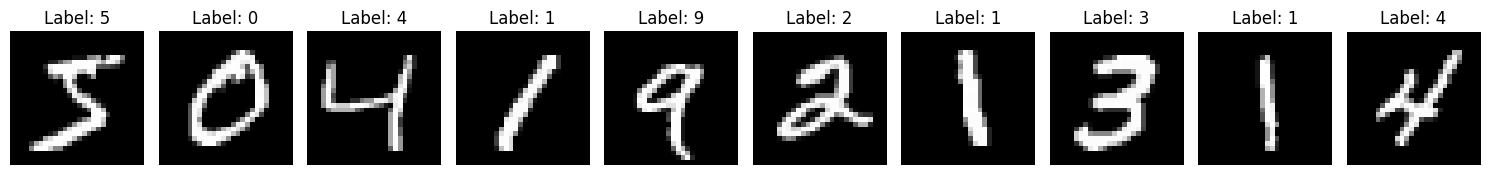

In [ ]:
# Step 3: Visualize a few samples
plt.figure(figsize=(15, 2)) # Adjusted figure size for 1x10 layout
for i in range(10):
  plt.subplot(1, 10, i+1) # Changed to 1 row, 10 columns
  plt.imshow(X_train[i].reshape(28,28), cmap='gray') # Reshape to 28x28 for visualization
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Preprocess the Data
# Normalize pixel values to 0–1 range
X_train = X_train / 255.0
X_test = X_test / 255.0
# Flatten 28x28 images to 784 features
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))
# One-hot encode labels (e.g., 5 -> [0,0,0,0,0,1,0,0,0,0])
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
model = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 6: Compile the Model
model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy']
)
# Step 7: Train the Model
history = model.fit(
X_train, y_train_cat,
epochs=10,
batch_size=128,
validation_split=0.1,
verbose=1
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8127 - loss: 0.6644 - val_accuracy: 0.9600 - val_loss: 0.1403
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9576 - loss: 0.1480 - val_accuracy: 0.9687 - val_loss: 0.1036
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9712 - loss: 0.0958 - val_accuracy: 0.9738 - val_loss: 0.0920
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9798 - loss: 0.0699 - val_accuracy: 0.9757 - val_loss: 0.0808
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9842 - loss: 0.0544 - val_accuracy: 0.9780 - val_loss: 0.0805
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9878 - loss: 0.0421 - val_accuracy: 0.9777 - val_loss: 0.0822
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9894 - loss: 0.0355 - val_accuracy: 0.9772 - val_loss: 0.0837
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9905 - loss: 0.0307 - val_accuracy: 0.

In [ ]:
# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test_cat,
verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")


Test Accuracy: 97.80%


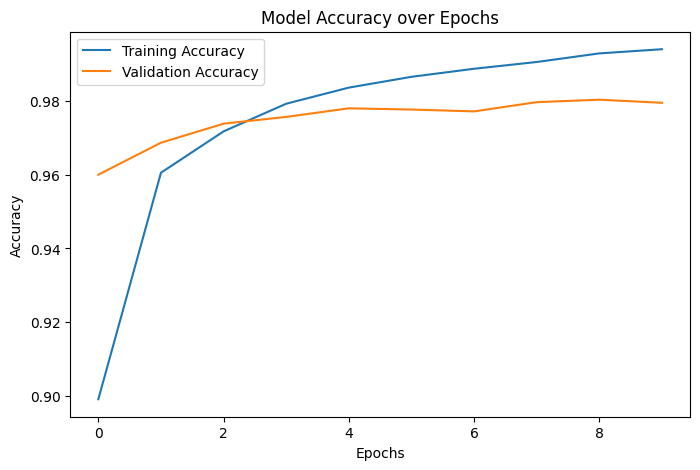

In [ ]:
# Step 9: Plot Training Curves
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


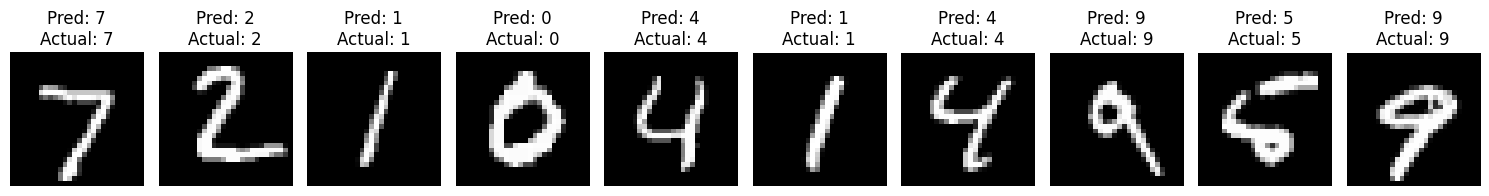

In [ ]:
# Step 10: Display Sample Predictions
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(15, 2)) # Adjusted figure size for 1x10 layout
for i in range(10):
  plt.subplot(1, 10, i+1) # Changed to 1 row, 10 columns
  plt.imshow(X_test[i].reshape(28,28), cmap='gray')
  plt.title(f"Pred: {predicted_classes[i]}\nActual: {y_test[i]}")
  plt.axis('off')
plt.tight_layout()
plt.show()

The developed neural network model achieved a high test accuracy of **97.80%** on the MNIST dataset, demonstrating its effectiveness in classifying handwritten digits.

From the sample predictions, we can observe that the model is generally accurate, correctly identifying most of the digits. For instance, the first image, which is a '7', was correctly predicted as '7'. Similarly, a '2' was predicted as '2', and a '1' as '1'. This indicates good generalization capabilities on unseen data.